# Projektna naloga

## Uvod

Tu bom analiziral podatke, dobljene iz spletne strani https://www.2kratings.com. Na spletni strani so podatki o atributih, ki jih imajo NBA igralci v igri NBA 2k24.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Uvažanje in urejanje podatkov

V spodnji tabeli so vidni vsi zajeti podatki. Številska vrednost pomeni, kako uspešen naj bi bil igralec v določenem elementu košarkarske igre. 

In [45]:
# Tu pred izpisom podatkov iz imen odstranimo nepotrebne znake.

pod = pd.read_csv("Informacije_o_igralcih.csv")
pod['ime'] = pod['ime'].str.replace('-', ' ')
pod['ekipa'] = pod['ekipa'].str.replace('-', ' ')
pod['polozaj'] = pod['polozaj'].str.replace("'", "")
pod['polozaj'] = pod['polozaj'].str.replace("[", "")
pod['polozaj'] = pod['polozaj'].str.replace("]", "")
pod

,ime,polozaj,ekipa,Close Shot,Mid-Range Shot,Three-Point Shot,Free Throw,Shot IQ,Offensive Consistency,Speed,...,Pass Vision,Perimeter Defense,Steal,Block,Lateral Quickness,Help Defense IQ,Pass Perception,Defensive Consistency,Offensive Rebound,Defensive Rebound
0,Trae Young,"PG, SG",Atlanta Hawks,91,82,84,89,98,98,84,...,89,55,43,32,70,58,70,30,36,42
1,Dejounte Murray,"SG, PG",Atlanta Hawks,89,90,79,83,85,95,83,...,72,85,59,40,85,85,85,85,35,60
2,Clint Capela,C,Atlanta Hawks,82,50,25,60,70,60,58,...,29,53,40,78,60,86,74,80,92,91
3,Onyeka Okongwu,"C, PF",Atlanta Hawks,89,88,60,78,70,75,74,...,31,64,42,84,69,83,65,65,83,80
4,Bogdan Bogdanovic,"SG, SF",Atlanta Hawks,96,81,84,83,70,90,75,...,51,63,42,50,75,60,60,50,33,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,Johnny Davis,"SG, SF",Washington Wizards,80,78,74,70,60,45,78,...,37,73,40,56,79,68,55,60,38,61
470,Patrick Baldwin Jr.,"SF, PF",Washington Wizards,70,72,82,74,70,60,57,...,33,59,41,56,64,55,54,40,39,72
471,Eugene Omoruyi,"PF, SF",Washington Wizards,60,68,69,68,95,80,70,...,32,73,63,35,76,68,40,65,60,54
472,Jared Butler,"PG, SG",Washington Wizards,86,65,74,78,95,70,80,...,60,60,70,60,74,55,47,50,33,54



## Analiziranje podatkov

### Najboljši igralci iz kategorij

V tem delu bo analiza pokazala, v koliko različnih kategorijah so igralci najboljši.

In [22]:
imena_stolpcev = pod.columns
najboljsi_igralci = {}
for podatek in imena_stolpcev[3:]:
    maximum = pod[podatek].max()
    oseba = pod[pod[podatek] == maximum]
    imena = oseba['ime'].tolist()
    najboljsi_igralci[podatek] = imena
df = pd.DataFrame(list(najboljsi_igralci.items()), columns=['Področje', 'Imena igralcev'])
igralci_naj = df['Imena igralcev'].explode().value_counts()
igralci_naj = igralci_naj.reset_index()
igralci_naj.columns = ['Igralec', 'Ponovitve']
igralci_naj.head(10)


,Igralec,Ponovitve
0,Luka Doncic,8
1,Ja Morant,6
2,Nikola Jokic,5
3,Stephen Curry,5
4,Kawhi Leonard,4
5,Jrue Holiday,4
6,Zion Williamson,4
7,Amen Thompson,4
8,Shai Gilgeous Alexander,4
9,Jimmy Butler,4


Tu je vidnih prvih 10 igralcev glede na to, kolikokrat imajo najvišjo vrednost v kategoriji. Opazimo lahko, da je v igri NBA 2k24 Luka Dončić na seznamu najvišje.

Spodnji graf pa bo pokazal koliko najboljših igralcev na posameznem področju ima ekipa.

In [4]:
import re
imena_stolpcev = pod.columns
najboljse_ekipe = []
for podatek in imena_stolpcev[3:]:
    maximum = pod[podatek].max()
    oseba = pod[pod[podatek] == maximum]
    imena = oseba['ime'].tolist()
    najboljsi_igralci[podatek] = imena
najekipe = pd.DataFrame(list(najboljsi_igralci.items()), columns=['Področje', 'Imena igralcev'])
igralci = najekipe['Imena igralcev'].explode()
for igralec in igralci:
    x = pod['ime'] == igralec
    igr = pod[x]
    ekipa = igr['ekipa']
    najboljse_ekipe.append(ekipa)
najboljse_ekipe = [str(x).split('\n')[0] for x in najboljse_ekipe]
najboljse_ekipe = [re.sub(r'^\d+\s+', '', x) for x in najboljse_ekipe]
ponovitve = {i : najboljse_ekipe.count(i) for i in najboljse_ekipe}
najekipe = pd.DataFrame(list(ponovitve.items()), columns=['Ekipa', 'Ponovitve'])

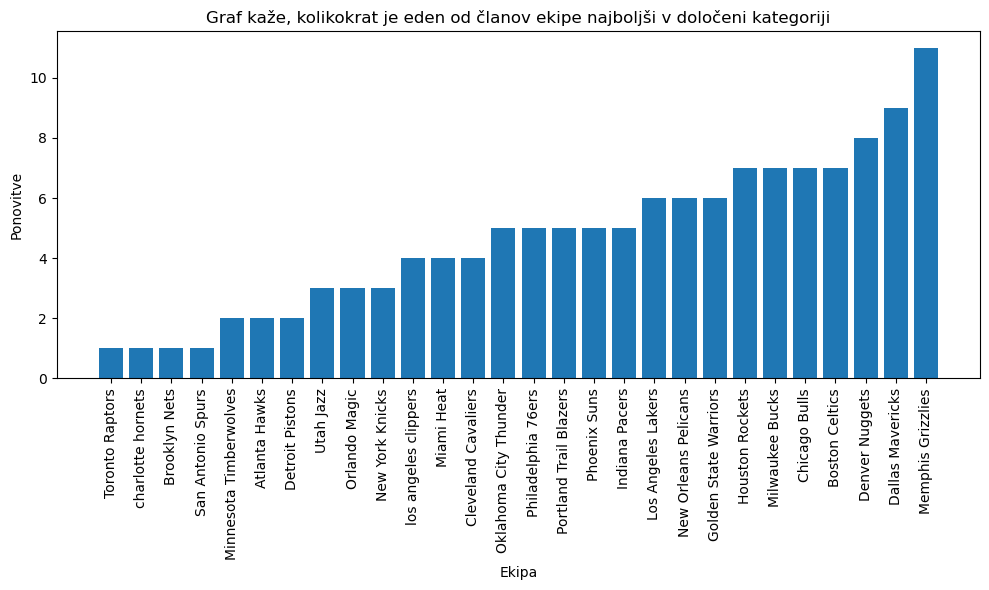

In [5]:
a = najekipe.sort_values('Ponovitve')
plt.figure(figsize=(10, 6))
plt.bar(a['Ekipa'], a['Ponovitve'])
plt.xticks(rotation=90)
plt.xlabel('Ekipa')
plt.ylabel('Ponovitve')
plt.title('Graf kaže, kolikokrat je eden od članov ekipe najboljši v določeni kategoriji')
plt.tight_layout()
plt.show()

## Računanje povprečij

### Računanje povprečja vseh vrednosti v ekipah

Najprej bom tabeli dodal dodaten stolpec s povprečnimi vrednostmi vseh kategorij za vsakega igralca.

In [6]:
stevilski_stolpci = pod.select_dtypes(include=['int'])
povprecje = stevilski_stolpci.mean(axis=1)
pod['povprecje'] = povprecje
pod

,ime,polozaj,ekipa,Close Shot,Mid-Range Shot,Three-Point Shot,Free Throw,Shot IQ,Offensive Consistency,Speed,...,Perimeter Defense,Steal,Block,Lateral Quickness,Help Defense IQ,Pass Perception,Defensive Consistency,Offensive Rebound,Defensive Rebound,povprecje
0,Trae Young,"PG, SG",Atlanta Hawks,91,82,84,89,98,98,84,...,55,43,32,70,58,70,30,36,42,68.942857
1,Dejounte Murray,"SG, PG",Atlanta Hawks,89,90,79,83,85,95,83,...,85,59,40,85,85,85,85,35,60,74.342857
2,Clint Capela,C,Atlanta Hawks,82,50,25,60,70,60,58,...,53,40,78,60,86,74,80,92,91,66.142857
3,Onyeka Okongwu,"C, PF",Atlanta Hawks,89,88,60,78,70,75,74,...,64,42,84,69,83,65,65,83,80,69.800000
4,Bogdan Bogdanovic,"SG, SF",Atlanta Hawks,96,81,84,83,70,90,75,...,63,42,50,75,60,60,50,33,51,68.057143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,Johnny Davis,"SG, SF",Washington Wizards,80,78,74,70,60,45,78,...,73,40,56,79,68,55,60,38,61,64.771429
470,Patrick Baldwin Jr.,"SF, PF",Washington Wizards,70,72,82,74,70,60,57,...,59,41,56,64,55,54,40,39,72,61.085714
471,Eugene Omoruyi,"PF, SF",Washington Wizards,60,68,69,68,95,80,70,...,73,63,35,76,68,40,65,60,54,63.371429
472,Jared Butler,"PG, SG",Washington Wizards,86,65,74,78,95,70,80,...,60,70,60,74,55,47,50,33,54,65.314286


#### Sedaj si lahko ogledamo, katere ekipe so najboljše glede na povprečno vrednost vseh vrednosti vseh igralcev.

In [7]:
ekipno_povprecje = pod.groupby('ekipa')['povprecje'].mean().reset_index()
sortirano = ekipno_povprecje.sort_values('povprecje', ascending=False)
sortirano

,ekipa,povprecje
8,Golden State Warriors,68.803810
9,Houston Rockets,67.701099
1,Boston Celtics,67.625210
20,Philadelphia 76ers,67.503297
19,Orlando Magic,67.215873
15,Minnesota Timberwolves,67.178571
12,Memphis Grizzlies,67.127731
21,Phoenix Suns,67.092437
28,los angeles clippers,67.084034
11,Los Angeles Lakers,67.063265


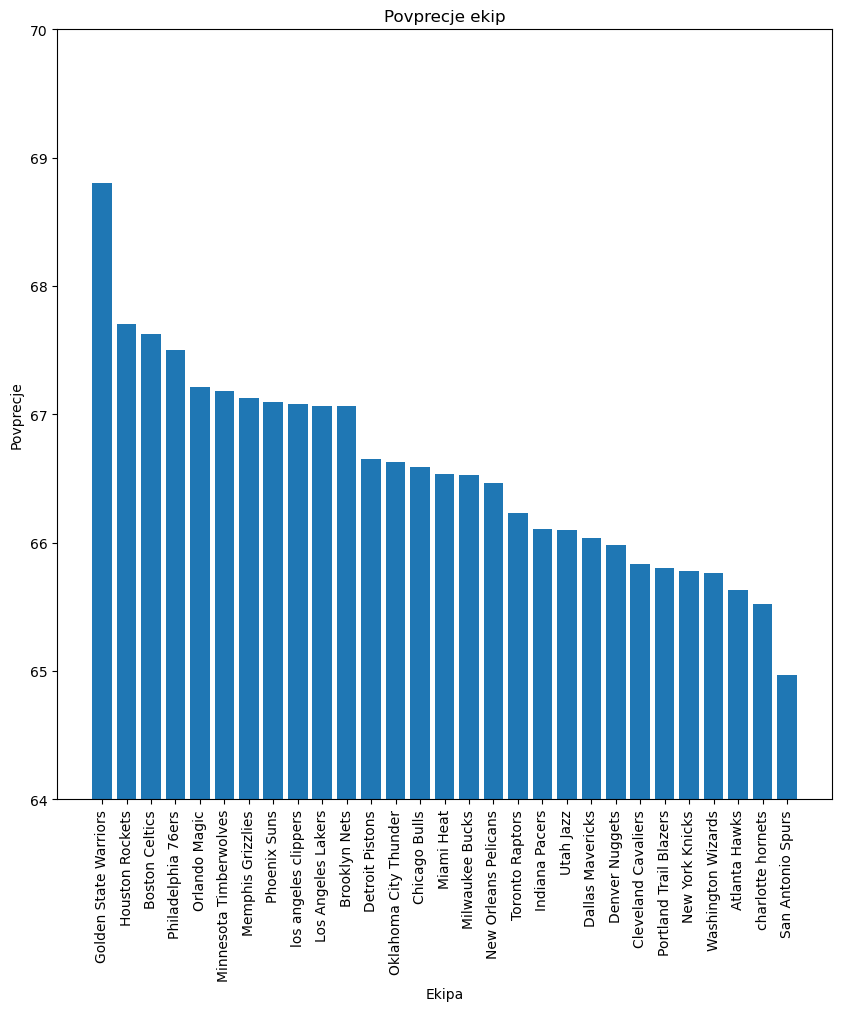

In [8]:
plt.figure(figsize=(10, 10))
plt.bar(sortirano['ekipa'], sortirano['povprecje'])
plt.xticks(rotation=90)
plt.xlabel('Ekipa')
plt.ylabel('Povprecje')
plt.title('Povprecje ekip')
plt.ylim(64, 70)
plt.show()

### Najboljših 10 igralcev glede na povprečje

Oglejmo si še najboljših 10 igralcev glede na povprečne vrednosti njihovih atributov.

In [9]:
top10_povprecje = pod.loc[:, ['ime','polozaj', 'povprecje']]
top10_povprecje = top10_povprecje.sort_values('povprecje', ascending=False).head(10)
top10_povprecje

,ime,polozaj,povprecje
212,LeBron James,"SF, PF",85.428571
259,Giannis Antetokounmpo,"PF, SF",84.657143
97,Luka Doncic,"PG, SG",84.257143
243,Jimmy Butler,"SF, PF",84.028571
17,Jayson Tatum,"SF, PF",83.857143
372,Kevin Durant,"PF, SF",82.285714
195,Kawhi Leonard,"SF, PF",82.057143
213,Anthony Davis,"C, PF",81.685714
359,Joel Embiid,C,81.571429
323,Shai Gilgeous Alexander,"PG, SG",81.542857


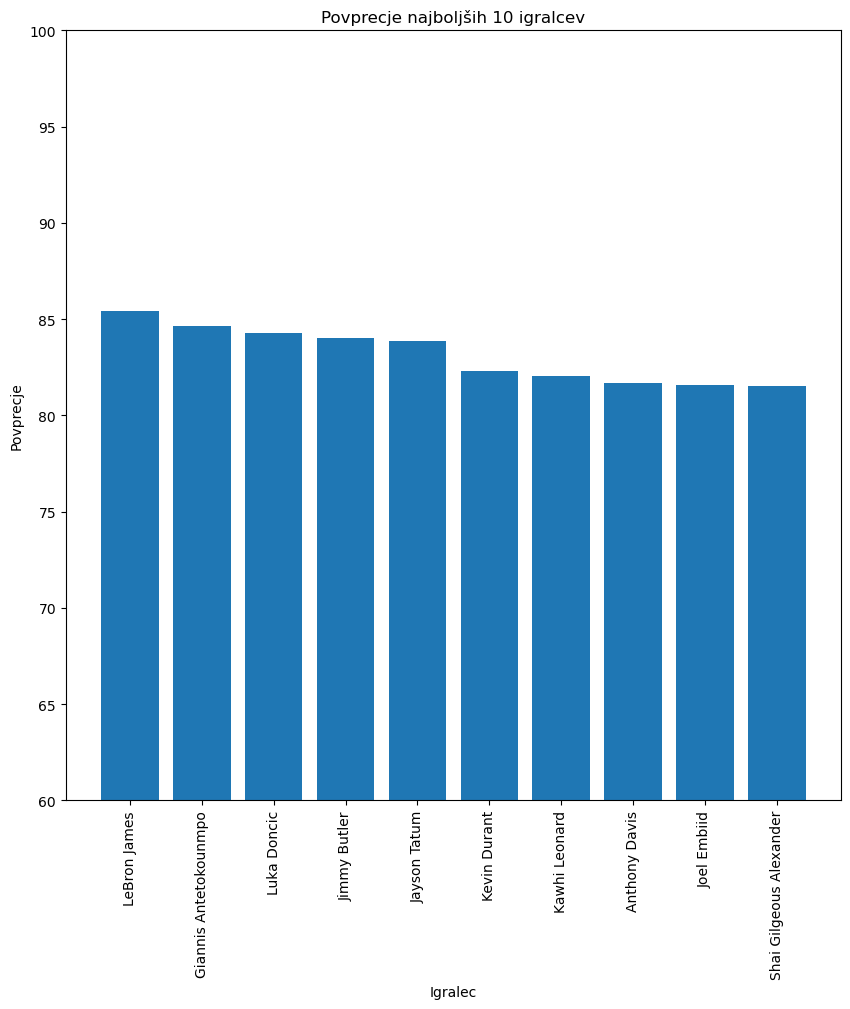

In [10]:
plt.figure(figsize=(10, 10))
plt.bar(top10_povprecje['ime'], top10_povprecje['povprecje'])
plt.xticks(rotation=90)
plt.xlabel('Igralec')
plt.ylabel('Povprecje')
plt.title('Povprecje najboljših 10 igralcev')
plt.ylim(60, 100)
plt.show()

### Graf povprecnih vrednosti vseh igralcev

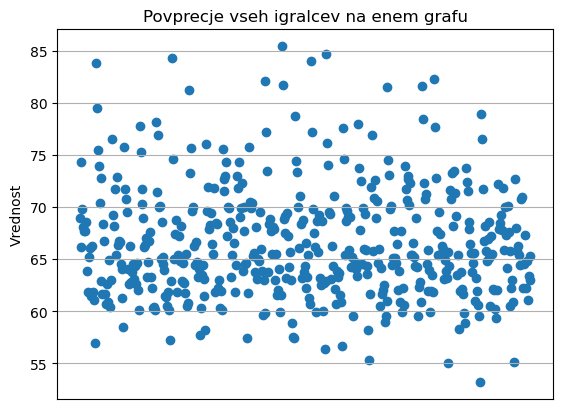

In [11]:
plt.scatter(pod['ime'], pod['povprecje'])
plt.title('Povprecje vseh igralcev na enem grafu')
plt.ylabel('Vrednost')
plt.grid(True)
plt.xticks([])
plt.show()

Na grafu povprečnih vrednosti vseh igralcev lahko vidimo, da ima večina igralcev povrečne vrednosti okrog 65.

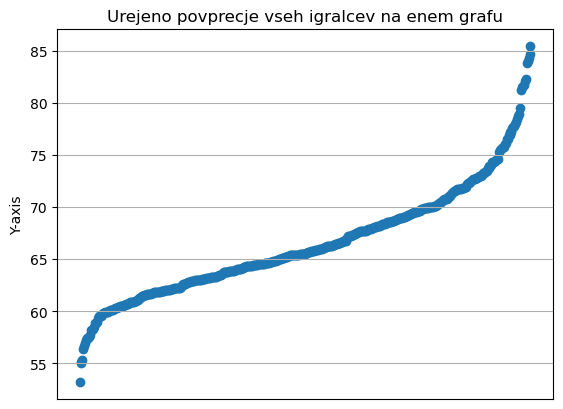

In [12]:
sortirano_povprecje = pod.sort_values('povprecje')
plt.scatter(sortirano_povprecje['ime'], sortirano_povprecje['povprecje'])
plt.title('Urejeno povprecje vseh igralcev na enem grafu')
plt.ylabel('Y-axis')
plt.grid(True)
plt.xticks([])
plt.show()

Ko vrednosti uredimo po velikosti, si lahko ogledamo kako hitro se povprečne vrednosti dvigajo.

## Igralni položaji

### Število igralcev na vsakem igralnem položaju

In [13]:
pod2 = pod

# Split the values on commas and explode them into separate rows
pod2['polozaj'] = pod2['polozaj'].str.split(', ')
pod2 = pod2.explode('polozaj')

# Count the occurrences of each item
sestevek_polozajev = pod2['polozaj'].value_counts()
sestevek_polozajev

polozaj
SG    214
SF    202
PF    179
C     132
PG    130
Name: count, dtype: int64